### Searching for SImilar Vectors

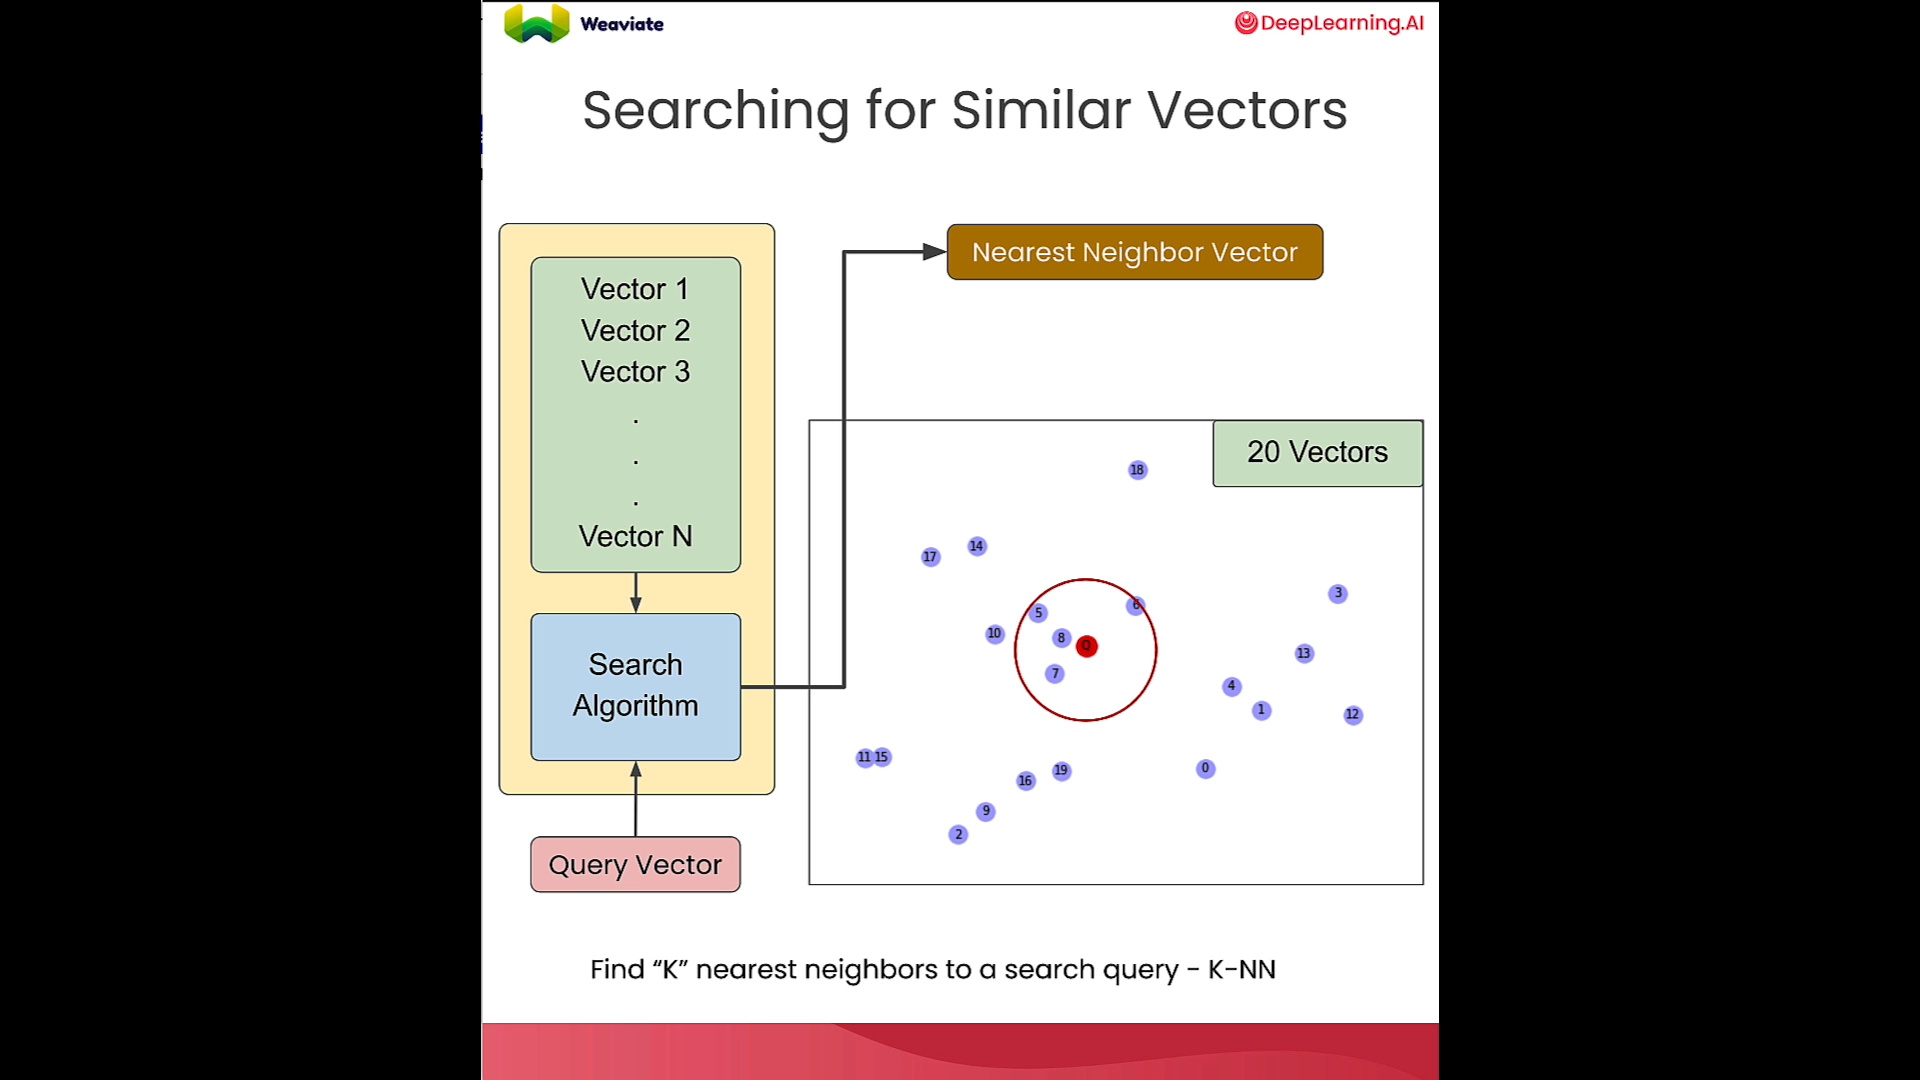


#### K Nearest Neighbors

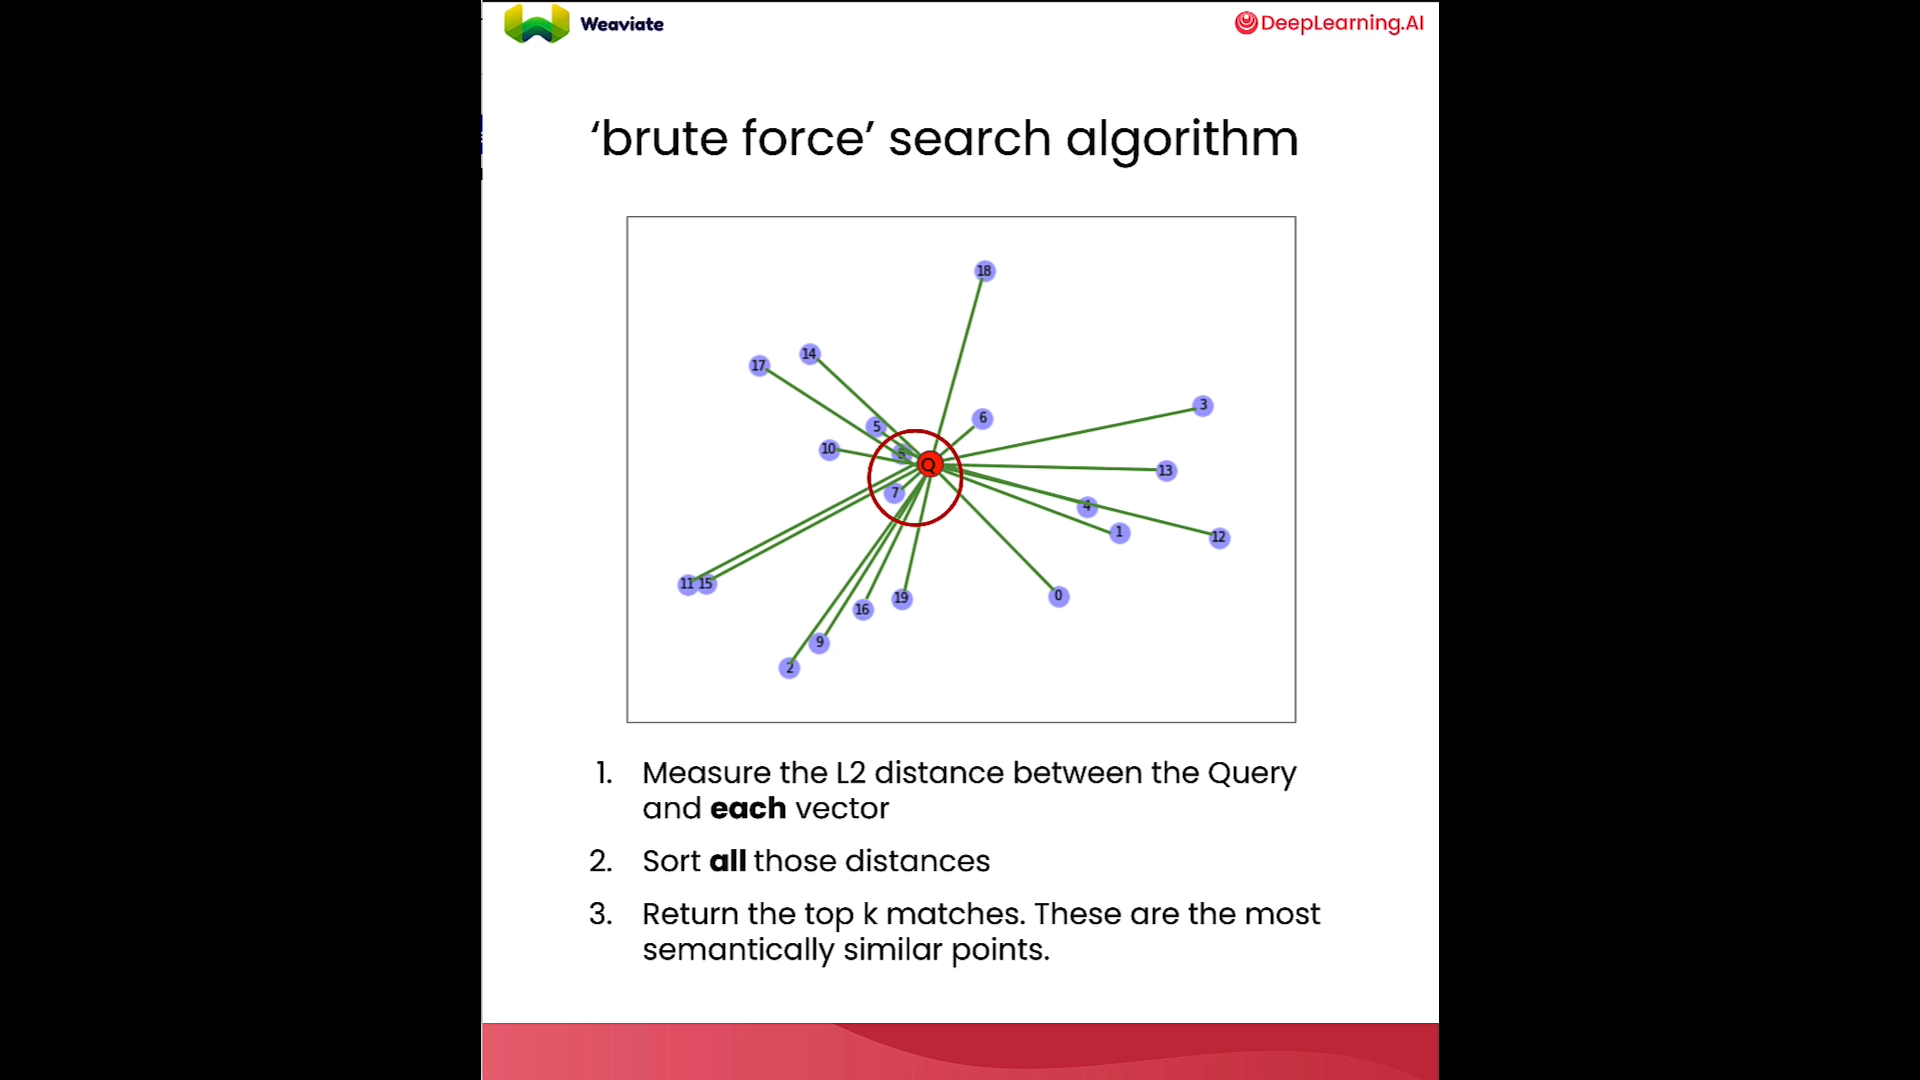

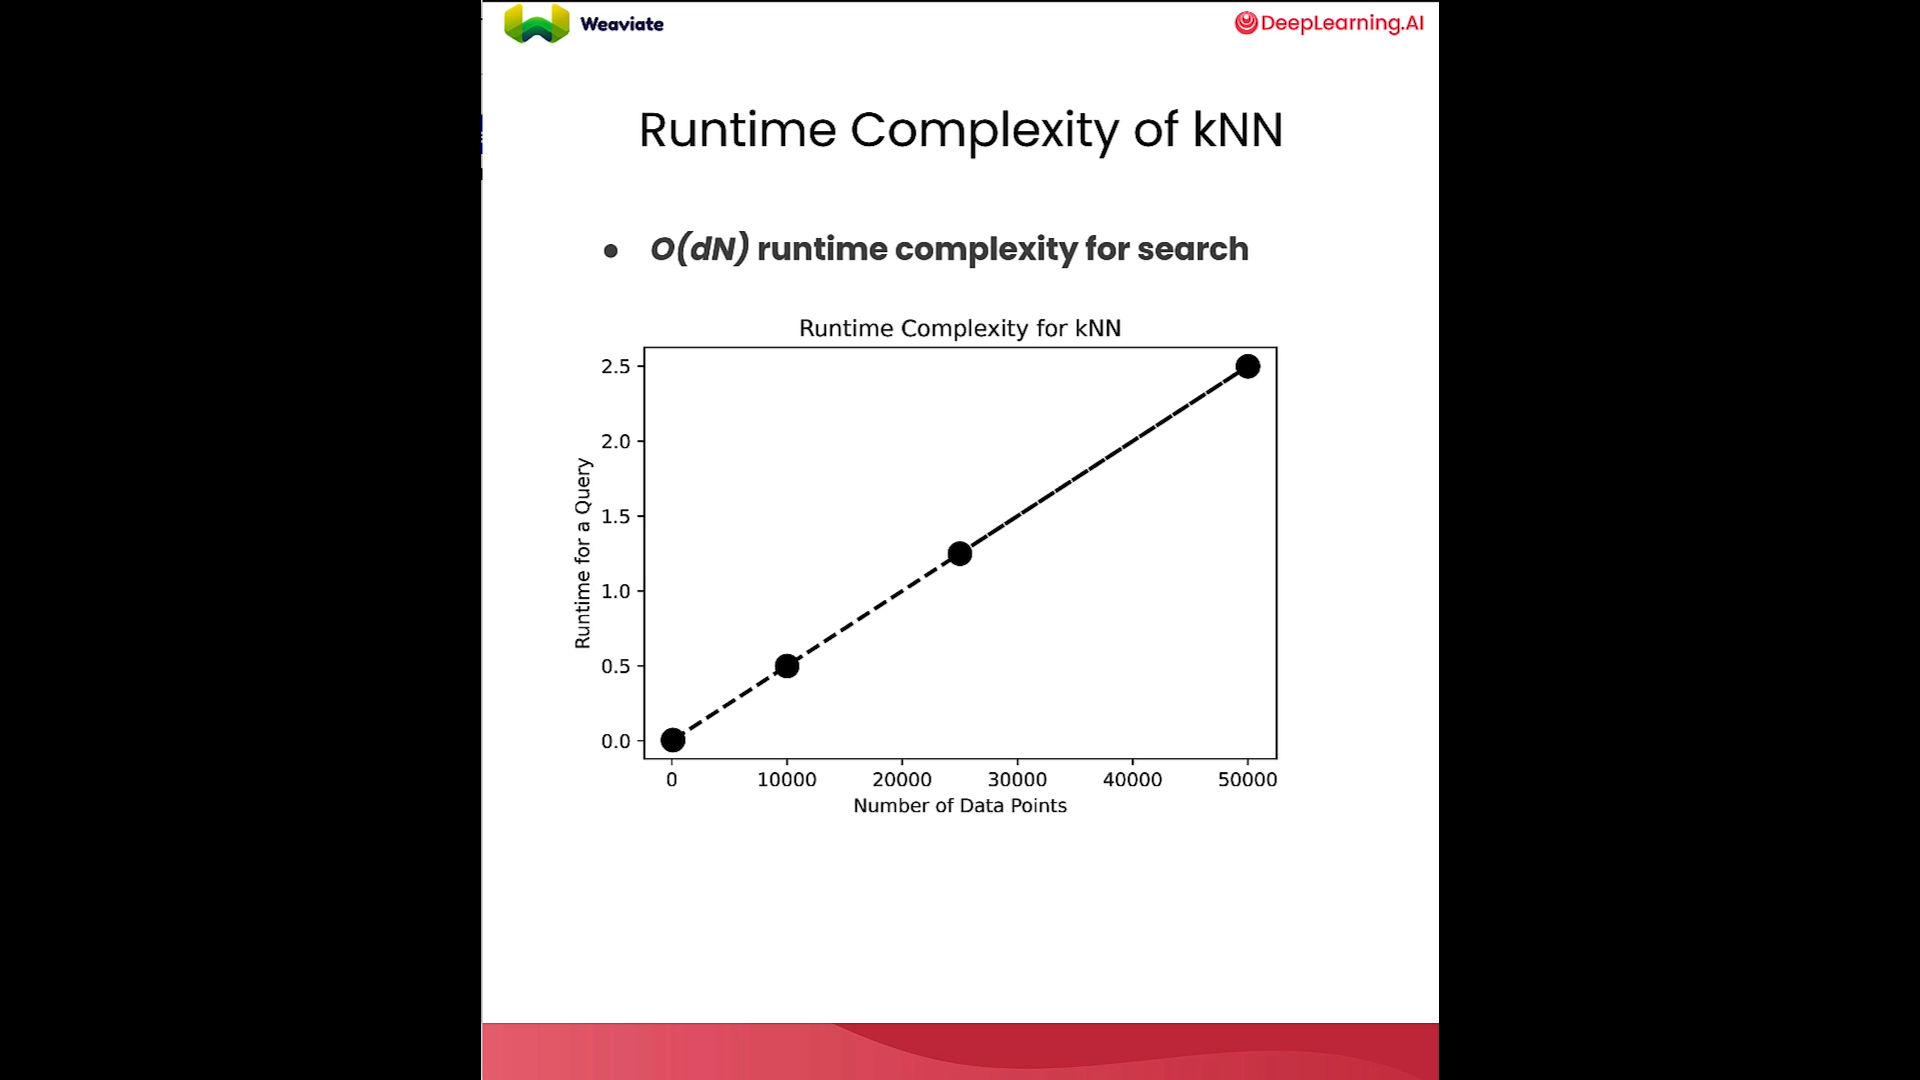

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import time
np.random.seed(42)

In [2]:
# Generate 20 data points with 2 dimensions
X = np.random.rand(20,2)

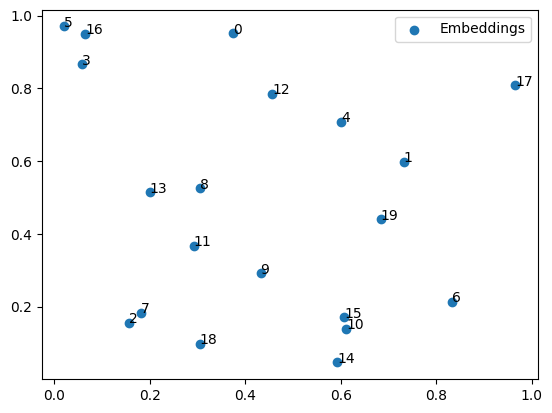

In [3]:
# Display Embeddings
n = range(len(X))

fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], label='Embeddings')
ax.legend()

for i, txt in enumerate(n):
    ax.annotate(txt, (X[i,0], X[i,1]))

In [4]:
k = 4

neigh = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
neigh.fit(X)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=4)

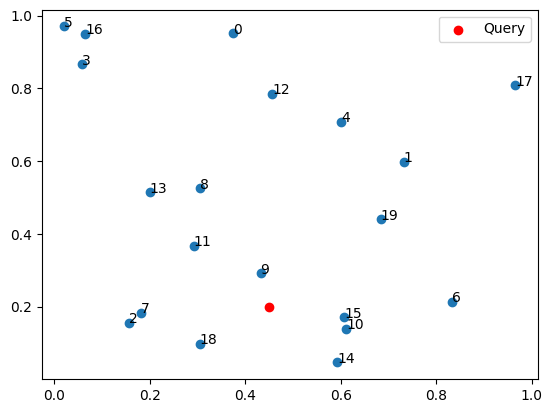

In [5]:
# Display Query with data
n = range(len(X))

fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1])
ax.scatter(0.45,0.2, c='red',label='Query')
ax.legend()

for i, txt in enumerate(n):
    ax.annotate(txt, (X[i,0], X[i,1]))

In [6]:
neighbours = neigh.kneighbors([[0.45,0.2]], k, return_distance=True)
print(neighbours)

(array([[0.09299859, 0.16027853, 0.1727928 , 0.17778682]]), array([[ 9, 15, 10, 18]]))


In [7]:
t0 = time.time()
neighbours = neigh.kneighbors([[0.45,0.2]], k, return_distance=True)
t1 = time.time()

query_time = t1-t0
print(f"Runtime: {query_time: .4f} seconds")

Runtime:  0.0020 seconds


In [8]:
def speed_test(count):
    # generate random objects
    data = np.random.rand(count,2)
    
    # prepare brute force index
    k=4
    neigh = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
    neigh.fit(data)

    # measure time for a brute force query
    t0 = time.time()
    neighbours = neigh.kneighbors([[0.45,0.2]], k, return_distance=True)
    t1 = time.time()

    total_time = t1-t0
    print (f"Runtime: {total_time: .4f}")

    return total_time

In [9]:
time20k = speed_test(20_000)

Runtime:  0.0012


In [10]:
# Brute force examples
time200k = speed_test(200_000)
time2m = speed_test(2_000_000)
time20m = speed_test(20_000_000)
time200m = speed_test(200_000_000)

Runtime:  0.0026
Runtime:  0.0162
Runtime:  0.1461
Runtime:  4.3363


## Above is only for 2d data . Now we will do Brute force kNN implemented by hand on `768` dimensional embeddings

In [11]:
documents = 1000
dimensions = 768

embeddings = np.random.randn(documents, dimensions) # 1000 documents, 768-dimensional embeddings
embeddings = embeddings / np.sqrt((embeddings**2).sum(1, keepdims=True)) # L2 normalize the rows, as is common

query = np.random.randn(768) # the query vector
query = query / np.sqrt((query**2).sum()) # normalize query

We are doing vector search on all 1000 documents which has 768 dimensions

In [12]:
# kNN

t0 = time.time()
# Calculate Dot Product between the query and all data items
similarities = embeddings.dot(query)
# Sort results
sorted_ix = np.argsort(-similarities)
t1 = time.time()

total = t1-t0
print(f"Runtime for dim={dimensions}, documents_n={documents}: {np.round(total,3)} seconds")

print("Top 5 results:")
for k in sorted_ix[:5]:
    print(f"Point: {k}, Similarity: {similarities[k]}")

Runtime for dim=768, documents_n=1000: 0.007 seconds
Top 5 results:
Point: 434, Similarity: 0.11658853328636033
Point: 41, Similarity: 0.10319523603880203
Point: 677, Similarity: 0.09041193794869379
Point: 13, Similarity: 0.0856056395158937
Point: 438, Similarity: 0.08410763673528121


In [13]:
n_runs = [1_000, 10_000, 100_000, 500_000]

for n in n_runs:
    embeddings = np.random.randn(n, dimensions) #768-dimensional embeddings
    query = np.random.randn(768) # the query vector
    
    t0 = time.time()
    similarities = embeddings.dot(query)
    sorted_ix = np.argsort(-similarities)
    t1 = time.time()

    total = t1-t0
    print(f"Runtime for 1 query with dim={dimensions}, documents_n={n}: {np.round(total,3)} seconds")

Runtime for 1 query with dim=768, documents_n=1000: 0.0 seconds
Runtime for 1 query with dim=768, documents_n=10000: 0.002 seconds
Runtime for 1 query with dim=768, documents_n=100000: 0.119 seconds
Runtime for 1 query with dim=768, documents_n=500000: 0.604 seconds


In [14]:
print (f"To run 1,000 queries: {total * 1_000/60 : .2f} minutes")

To run 1,000 queries:  10.06 minutes


This is very slow. We cannot use this for finding similar vectors